In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from util import get_stock, bin_data, split_data

In [2]:
# Define parameters
stock = ['^GSPC', '1980-01-01', '2024-10-01']

# Get the stock data, makes bins, and split the data
df, index = get_stock(stock[1], stock[2], stock[0])
bin_size = 365
bins = bin_data(df, bin_size)
X_train, y_train, X_test, y_test, train_index, test_index, train_size, test_size = split_data(bins, df, index, bin_size)

[*********************100%***********************]  1 of 1 completed


# Train The Linear Model

### Specifics:
Consider the time series data input as a vector $x = \begin{bmatrix} x_{t - k} \\  \dots \\ x_{t-1} \end{bmatrix}$

let $x^* = \begin{bmatrix} 1 \\ x \end{bmatrix}$
and $w = \begin{bmatrix} b \\  w_{t-k} \\  \vdots \\  w_{t-1} \end{bmatrix}$

We make $x_0 = 1$ and $w_0 = b$ the bias term

We minimize the Mean Squared Error:
$MSE = \frac{1}{n} \sum_{i = 1}^{n} (w^T x_i - y_i)^2$ and find the optimal weights by taking the derivative and solving for $w$

$$\min_{w \in R^{k + 1}} \enspace MSE = \min_{ w \in R^{k + 1}} \enspace \frac{1}{n} \sum_{i = 1}^{n} ( w^T  x_i - y_i)^2 
$$
    $$\implies \frac{\partial}{\partial  w} \left [ \frac{1}{n} \sum_{i = 1}^{n} \left [ ( w^T  x_i)^2 - 2 y_i  w^T  x_i + y_i^2 \right ] \right ] = 0 \\
    \sum_{i = 1}^{n} \left [ \left ( 2  w^T  x_i \right )  x_i - 2 y_i  x_i \right ] = 0$$

let $X = bins$

$$2  X ( X  w^T)^T - 2  X  y = 0$$
$$ X  X^T  w =  X  y $$
$$w = \left (  X  X^T \right )^{-1}  X  y$$

In [3]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.coef_) # weights, size is bin size
print(model.intercept_) # bias

[ 1.28918852e-02 -4.18843609e-03  2.02548956e-02 -3.48470955e-02
  1.20410617e-02 -1.05403039e-02  4.91985116e-03 -4.77124269e-03
  1.14557891e-02 -8.31564393e-03 -1.32889920e-02  2.34214207e-02
  7.91363145e-03 -1.08364344e-02  2.79973077e-04 -1.18696643e-02
  1.20110802e-02 -7.30969593e-03  1.12234840e-02 -2.05913398e-02
  1.84947114e-02 -2.66569837e-03  5.40634128e-04  1.42189023e-02
 -5.88658868e-02  1.70935744e-02  7.47465189e-03  7.01724434e-03
 -2.24899543e-02  3.21055306e-02 -1.37757457e-02  8.97504634e-04
 -5.93048265e-03  2.01672132e-02  1.28175656e-02  6.43592420e-04
 -1.77560675e-02 -1.96493719e-02 -4.98119186e-03  3.25306798e-02
  1.66148495e-03 -5.62022770e-03 -3.71687867e-03 -1.30870403e-02
  3.47405043e-02 -3.15382318e-02  2.04533551e-02 -3.40733999e-02
  5.42276149e-03  2.00392558e-02 -8.79536420e-03  2.05684145e-02
 -1.62319941e-02 -1.28226036e-02  2.87186950e-02  2.42090936e-03
 -2.94661409e-02  3.76274015e-02 -9.57476243e-03 -2.12633063e-02
  1.23387482e-02 -2.67836

In [4]:
# now we make some predictions
y_pred = np.floor(model.predict(X_test))
y_test = np.floor(y_test)
print(y_pred.shape, y_test.shape)

for i in range(math.floor(len(y_pred) * 0.01)):
    print("prediction:", y_pred[i], "| actual:", y_test[i], "| difference:", abs(y_pred[i] - y_test[i]))
# print(y_pred)
print(X_test.shape)


(2183,) (2183,)
prediction: 1904.0 | actual: 1882.0 | difference: 22.0
prediction: 1886.0 | actual: 1893.0 | difference: 7.0
prediction: 1891.0 | actual: 1940.0 | difference: 49.0
prediction: 1940.0 | actual: 1939.0 | difference: 1.0
prediction: 1931.0 | actual: 1903.0 | difference: 28.0
prediction: 1905.0 | actual: 1912.0 | difference: 7.0
prediction: 1915.0 | actual: 1915.0 | difference: 0.0
prediction: 1912.0 | actual: 1880.0 | difference: 32.0
prediction: 1886.0 | actual: 1853.0 | difference: 33.0
prediction: 1868.0 | actual: 1852.0 | difference: 16.0
prediction: 1846.0 | actual: 1851.0 | difference: 5.0
prediction: 1845.0 | actual: 1829.0 | difference: 16.0
prediction: 1831.0 | actual: 1864.0 | difference: 33.0
prediction: 1867.0 | actual: 1895.0 | difference: 28.0
prediction: 1894.0 | actual: 1926.0 | difference: 32.0
prediction: 1920.0 | actual: 1917.0 | difference: 3.0
prediction: 1918.0 | actual: 1917.0 | difference: 1.0
prediction: 1914.0 | actual: 1945.0 | difference: 31.0
p

In [5]:
print(model.score(X_test, y_test))

0.9982399040629543


# Results
As can be seen, the results are relatively close to the actual values if we adjust for a small margin of error.

(8732,) (2183,)


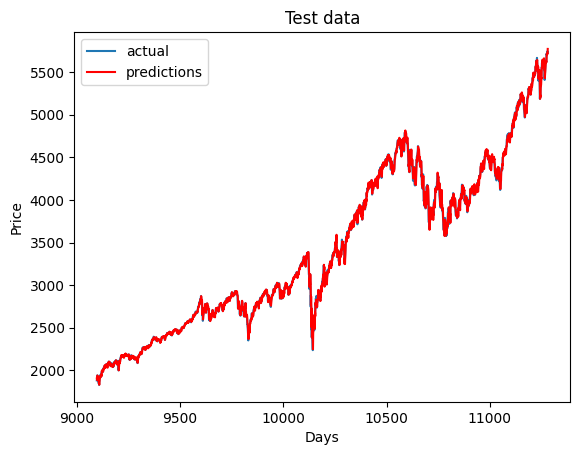

Correctly Classified: 1832/2183
Accuracy: 83.92120934493816%, error_margin of $50
Correctly Classified: 2116/2183
Accuracy: 96.93082913421897%, error_margin of $100


In [6]:
print(train_index.shape, test_index.shape)
plt.plot(test_index, y_test, label="actual")
plt.plot(test_index, y_pred, color="red", label="predictions")
plt.title("Test data")
plt.ylabel("Price")
plt.xlabel("Days")
plt.legend()
plt.show()

error_margin = 50
results = abs(y_pred - y_test) <= error_margin
print(f"Correctly Classified: {np.sum(results)}/{len(results)}")
print(f"Accuracy: {100 * np.sum(results) / len(results)}%, error_margin of ${error_margin}")

error_margin = 100
results = abs(y_pred - y_test) <= error_margin
print(f"Correctly Classified: {np.sum(results)}/{len(results)}")
print(f"Accuracy: {100 * np.sum(results) / len(results)}%, error_margin of ${error_margin}")